Number of wavenumbers to consider: 7468
Number of samples per group to consider: 19


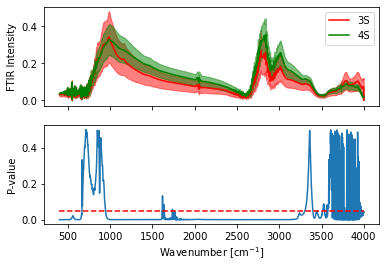

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spstat

#Initialise variables
directory = "/Users/daniellesicotte/Library/Mobile Documents/com~apple~CloudDocs/Cambridge/MPhil Thesis/DATA/FTIR/FTIR Spelt Samples/"
groupnames = ['3S', '4S'] #['1B', '2B', '3B', '4B']
colors = ['r', 'g', 'b', 'k']

#Determine min length of wavenumber array
min_num_wavenumbers = 1e10
for group_index,groupname in enumerate(groupnames):
    group_filenames = os.listdir(directory+groupname+'/')

    selected_filenames = []
    for filename in group_filenames:
        if filename[-3:] == "CSV":
            selected_filenames.append(filename)
            
    for file_index,filename in enumerate(selected_filenames):
        with open(directory+groupname+'/'+filename,'r') as f:
            tst = f.readlines()
        num_wns = len(tst)
        if num_wns < min_num_wavenumbers:
            min_num_wavenumbers = num_wns
            
print("Number of wavenumbers to consider:", min_num_wavenumbers)
            
#Determine min number of samples number of samples used for each group
min_num = 1e10
for group_index,groupname in enumerate(groupnames):
    group_filenames = os.listdir(directory+groupname+'/')

    selected_filenames = []
    for filename in group_filenames:
        if filename[-3:] == "CSV":
            selected_filenames.append(filename)
            
    num = len(selected_filenames)
    if num < min_num:
        min_num = num
        
print("Number of samples per group to consider:", min_num)
        
#Compute mean and st dev for each wavenumber
fig, axs = plt.subplots(2,sharex=True)
all_intensities = []
for group_index,groupname in enumerate(groupnames):
    group_filenames = os.listdir(directory+groupname+'/')

    selected_filenames = []
    for filename in group_filenames:
        if filename[-3:] == "CSV":
            selected_filenames.append(filename)
            
    spectra = np.zeros((len(selected_filenames),min_num_wavenumbers,2))
    group_num_samples = 0
    for file_index,filename in enumerate(selected_filenames):
        if group_num_samples == min_num:
            break
        with open(directory+groupname+'/'+filename,'r') as f:
            raw = f.readlines()
        for line_index in range(min_num_wavenumbers):
            line = raw[line_index]
            line = line.replace('\n','')
            line = line.split(',')
            try:
                spectra[file_index,line_index,:] = np.array(line,dtype=np.float64)
            except IndexError:
                print(groupname)
                print(filename)
                print("aw shucks :'(")
        group_num_samples += 1
        
    wavenumbers = spectra[0,:,0]
    group_intensities = spectra[:,:,1]
    all_intensities.append(group_intensities)

    mean_intensities = np.mean(group_intensities,axis=0)
    std_intensities = np.std(group_intensities,axis=0)

    axs[0].plot(wavenumbers[::-1],mean_intensities,c=colors[group_index],label=groupname)
    axs[0].fill_between(wavenumbers[::-1],mean_intensities-std_intensities,mean_intensities+std_intensities,alpha=0.5,color=colors[group_index])

axs[0].legend()
        
#Truncate datasets to min length
for i in range(len(groupnames)):
    all_intensities[i] = all_intensities[i][:min_num,:]
all_intensities = np.array(all_intensities)

test_index1,test_index2 =  0,1
p_values = np.zeros((min_num_wavenumbers))
for i in range(min_num_wavenumbers):
    #p_values[i] = spstat.ttest_ind(all_intensities[ttest_index1][:,i], all_intensities[ttest_index2][:,i], axis=0, equal_var=False, nan_policy='propagate', alternative='two-sided', trim=0).pvalue
    mean1,mean2 = np.mean(all_intensities[test_index1,:,i]),np.mean(all_intensities[test_index2,:,i])
    std1,std2 = np.std(all_intensities[test_index1,:,i]),np.std(all_intensities[test_index2,:,i])
    t_val = (np.sqrt(min_num)*np.abs(mean1-mean2))/np.mean(np.array([std1,std2]))
    p_values[i] = 1-spstat.t.cdf(t_val,min_num-2)
    
axs[1].plot(wavenumbers,p_values)
axs[1].set_xlabel(r"Wavenumber [cm$^{-1}$]")
axs[0].set_ylabel("FTIR Intensity")
axs[1].set_ylabel("P-value")

confidence_level = 0.05
axs[1].plot([wavenumbers[0],wavenumbers[-1]],[confidence_level,confidence_level],c='r',linestyle='--')

    
plt.savefig("/Users/daniellesicotte/Library/Mobile Documents/com~apple~CloudDocs/Cambridge/MPhil Thesis/DATA/FTIR/3S_4S.png",dpi=300,bbox_inches='tight')
plt.show()
        

        
